In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

# Not my red-yellow-green colourmap, but the beige - green colourmap
c = ['#DACAA0','#B59441','#887D3D','#5A6638','#2D331C']
my_cmap = mpl.colors.ListedColormap(c)

In [6]:
sep = pd.read_csv("Septoria_RR98.csv",index_col=0)
#print(list(sep.columns))
#print(list(sep.index))

headings = ['Non-chemical control strategies', 'Point of use', 'Effectiveness', 'Strength of evidence', 'Inexpensive to implement', 'Economic importance', 'Ease of implementation', 'Speed of impact', 'Current use','Potential use']
heading_dict = {'Non-chemical control strategies':'Strategy', 'Inexpensive to implement':'Inexpensive', 'Ease of implementation':'Ease'}

row_dict = {'Efficacy of chemical control (for reference)':'Fungicide', 'Field history, rotation and break crops':'Field rotation', 'Primary cultivations (crop residue burial)':'Residue burial', 'Bioprotectants and low risk PPP’s':'Biocontrols', 'Decision support (incl thresholds)':'DSS'}

sep = pd.read_csv("Septoria_RR98.csv",usecols = headings,index_col=0)
sep = sep.rename(columns=heading_dict, index = row_dict)
sep

,Point of use,Effectiveness,Strength of evidence,Inexpensive,Economic importance,Ease,Speed of impact,Current use,Potential use
Non-chemical control strategies,,,,,,,,,
Fungicide,-,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Field rotation,Crop planning,1,4.0,3.0,5.0,3.0,2.0,1.0,1.0
Residue burial,Pre-cropping,1,2.0,3.0,5.0,3.0,3.0,1.0,1.0
Seed rate,Pre-cropping,1,3.0,2.0,5.0,2.0,2.0,1.0,1.0
Sowing date,Pre-cropping,3,4.0,4.0,5.0,2.0,4.0,2.0,4.0
Variety choice,Pre-cropping,4,5.0,4.0,5.0,4.0,4.0,4.0,5.0
Variety mixtures,Pre-cropping,4,3.0,4.0,5.0,3.0,3.0,1.0,3.0
Biocontrols,In-crop,3,2.0,3.0,5.0,4.0,4.0,1.0,3.0
DSS,In-crop,4,3.0,4.0,5.0,3.0,4.0,2.0,4.0


In [7]:
# cmap = mpl.colors.ListedColormap(plt.cm.copper(np.linspace(0.2,1,7)))
# sep.plot.bar(figsize = (12,6), rot = 30, width=0.8, colormap=cmap)
# plt.legend(loc = [0.7, 1.05])
# plt.ylabel("Score ( 5 - good, 1 - bad)")
# plt.show()

In [8]:
# sep_trans = sep.transpose()
# sep_trans = sep_trans.drop("Point of use")
# #display(sep_temp)

# cmap = mpl.colors.ListedColormap(plt.cm.copper(np.linspace(0.2,1,10)))
# sep_trans.plot.bar(figsize = (12,6), rot = 0, width=0.85, colormap=cmap)
# plt.legend(loc = [0.7, 1.05])
# plt.ylabel("Score ( 5 - good, 1 - bad)")
# plt.show()

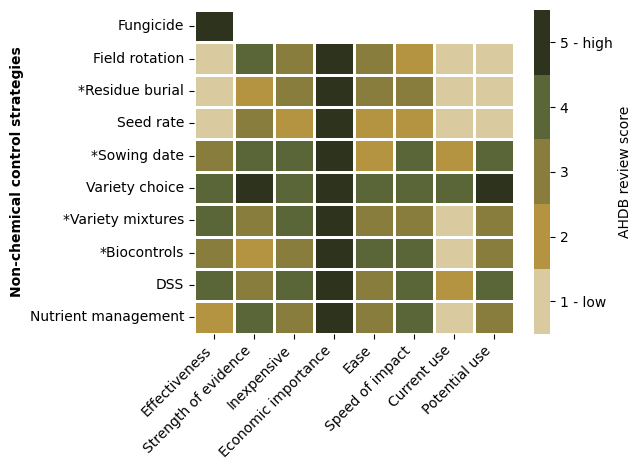

In [11]:
sep_temp2 = sep.drop("Point of use",axis=1)

fig,ax = plt.subplots(1)
sns.heatmap(sep_temp2,cmap = my_cmap,vmin = 0.5, vmax = 5.5,linewidths = 1,ax=ax,cbar_kws={'label': 'AHDB review score'})
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(1,6,1))
cbar.set_ticklabels(["1 - low","2","3","4","5 - high"])
ax.set_xticklabels(ax.get_xticklabels(),rotation='45',ha='right')

our_interv = ["Residue burial", "Sowing date", "Variety mixtures", "Biocontrols"]

new_labels = ["*"+i.get_text() if i.get_text() in our_interv else i.get_text() for i in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)

ax.set_ylabel(ax.get_ylabel(),weight='bold')
ax.set_xlabel(ax.get_xlabel(),weight='bold')
        
plt.tight_layout()

fig.savefig('fig_IPM_data.pdf', dpi=400)